**Data Cleaning & Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('GlobalWeatherRepository.csv')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58075 entries, 0 to 58074
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       58075 non-null  object 
 1   location_name                 58075 non-null  object 
 2   latitude                      58075 non-null  float64
 3   longitude                     58075 non-null  float64
 4   timezone                      58075 non-null  object 
 5   last_updated_epoch            58075 non-null  int64  
 6   last_updated                  58075 non-null  object 
 7   temperature_celsius           58075 non-null  float64
 8   temperature_fahrenheit        58075 non-null  float64
 9   condition_text                58075 non-null  object 
 10  wind_mph                      58075 non-null  float64
 11  wind_kph                      58075 non-null  float64
 12  wind_degree                   58075 non-null  int64  
 13  w

In [2]:
# Check missing values
print(df.isnull().sum())

# Fill missing values using forward fill
df.ffill(inplace=True)

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

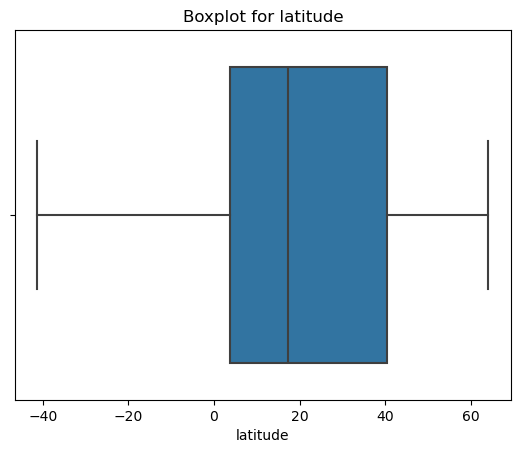

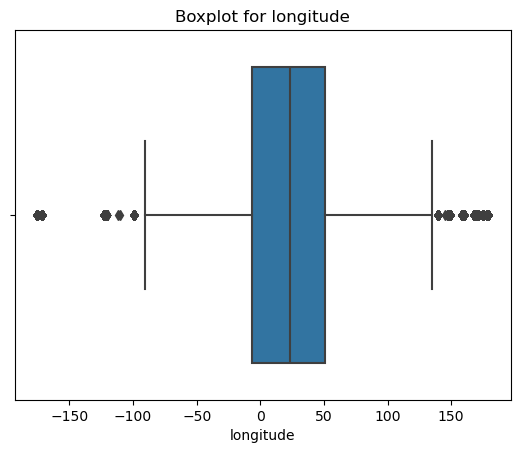

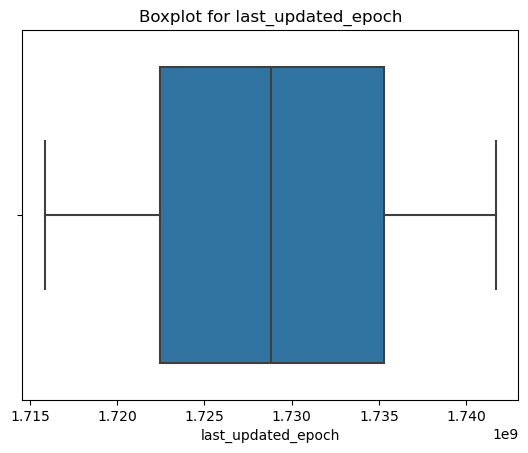

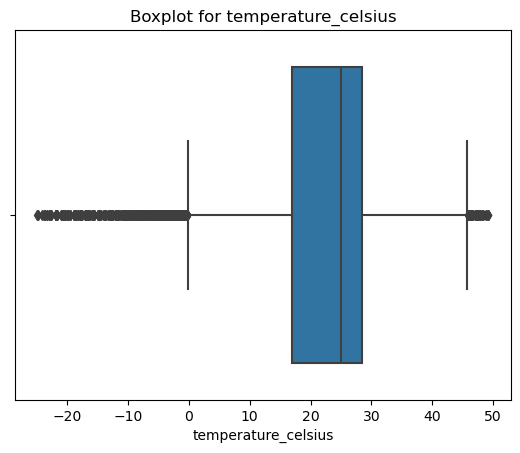

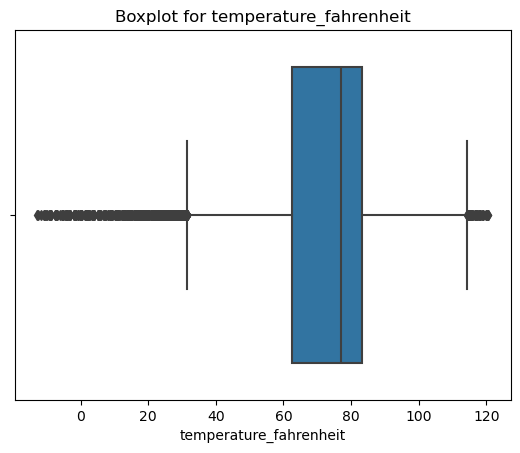

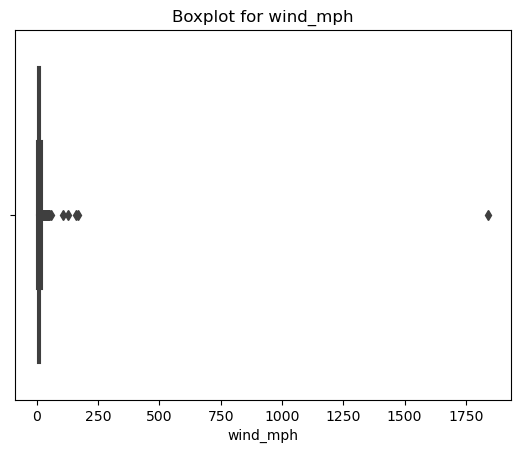

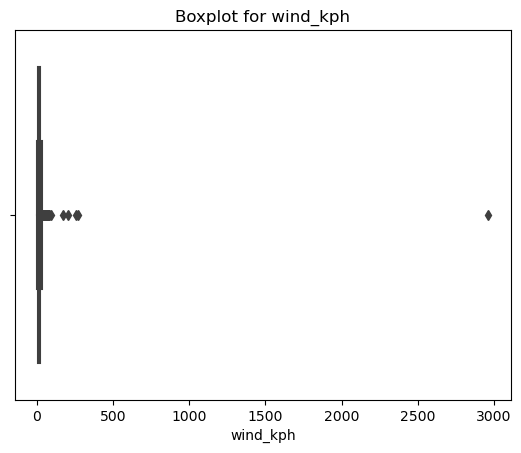

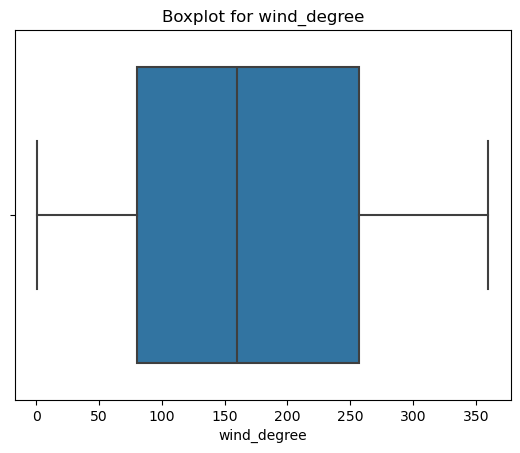

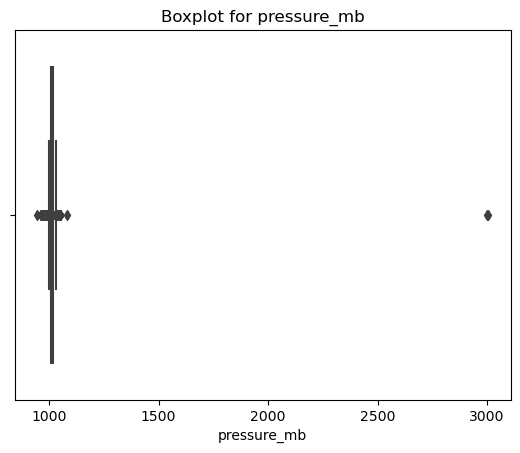

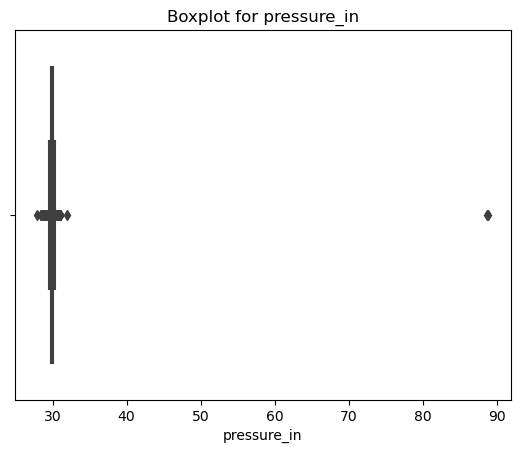

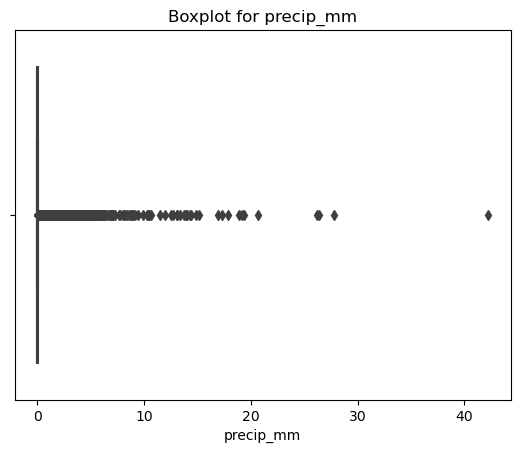

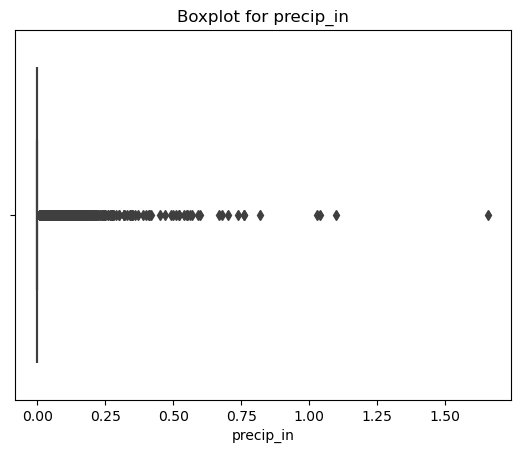

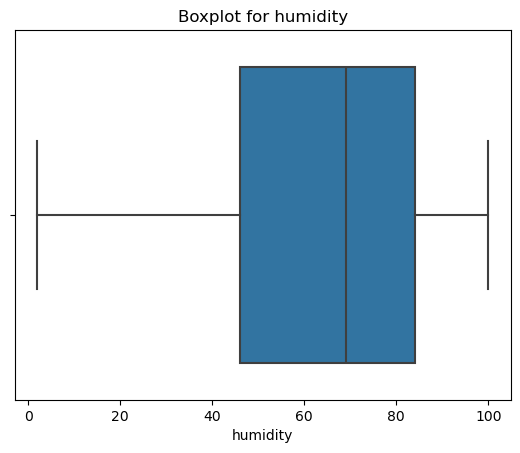

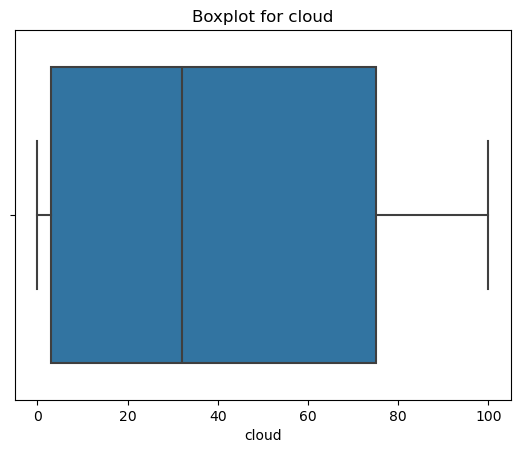

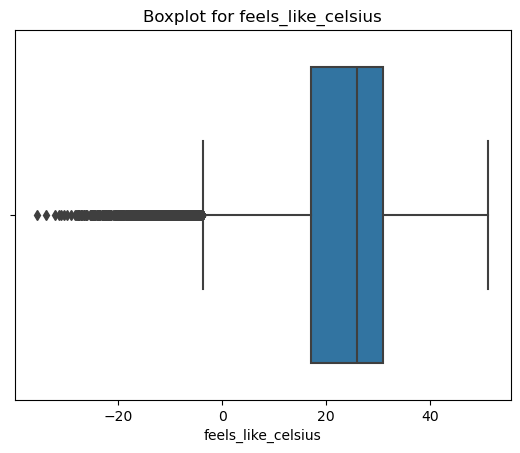

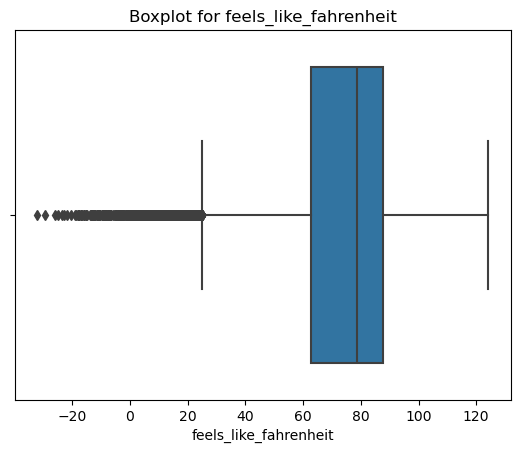

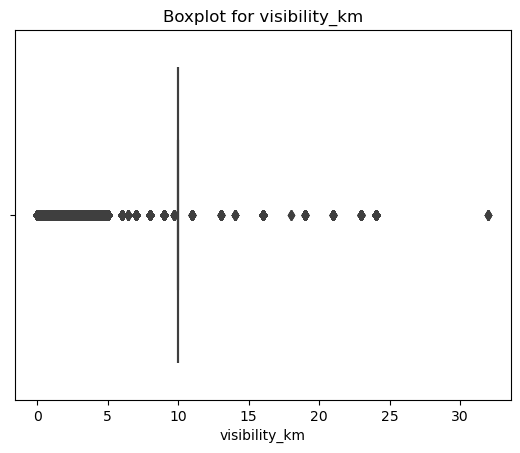

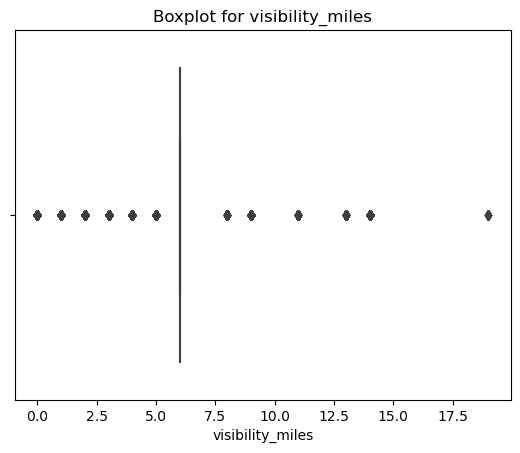

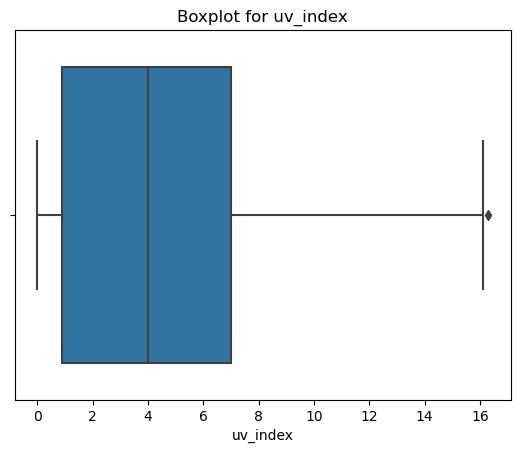

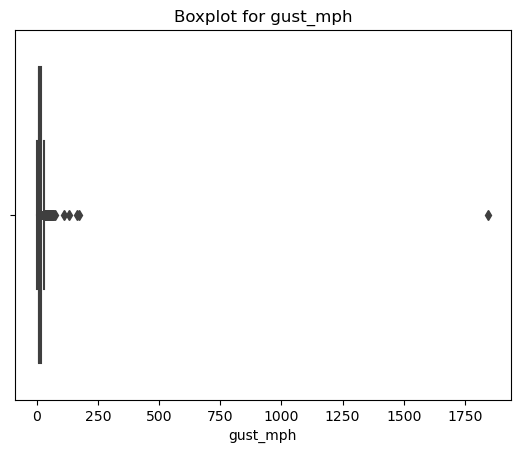

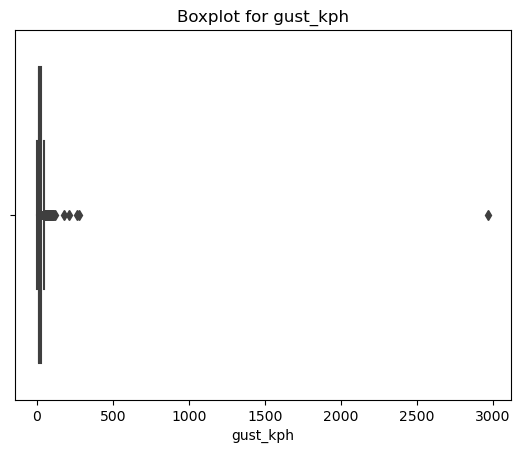

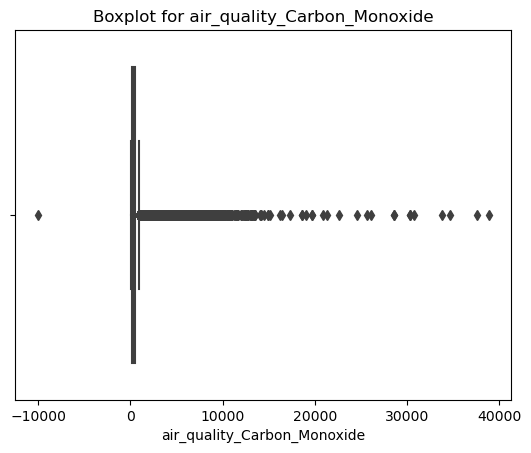

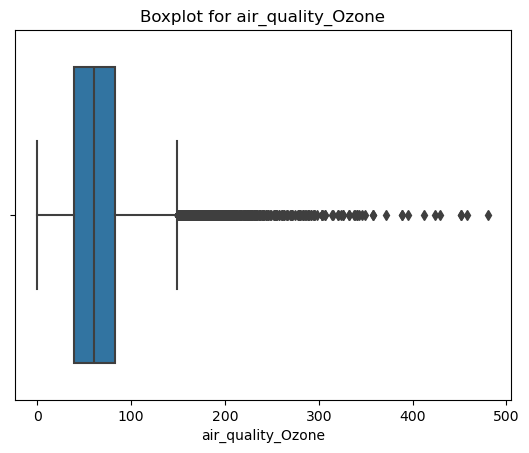

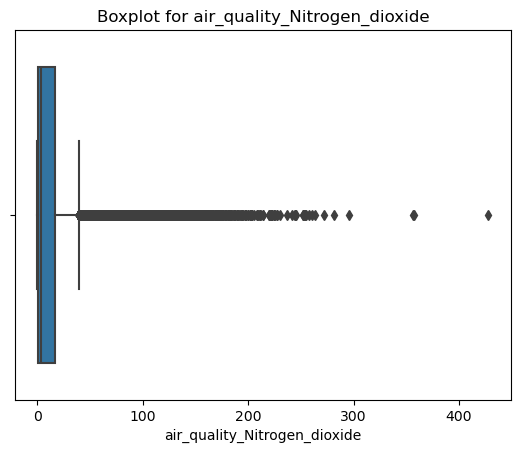

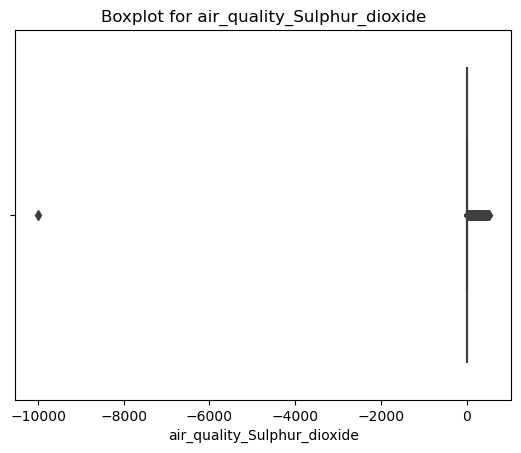

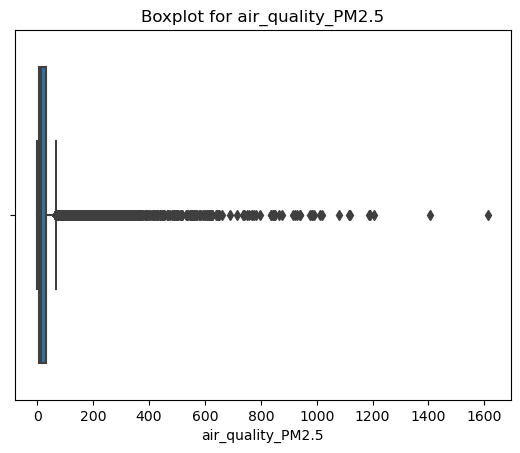

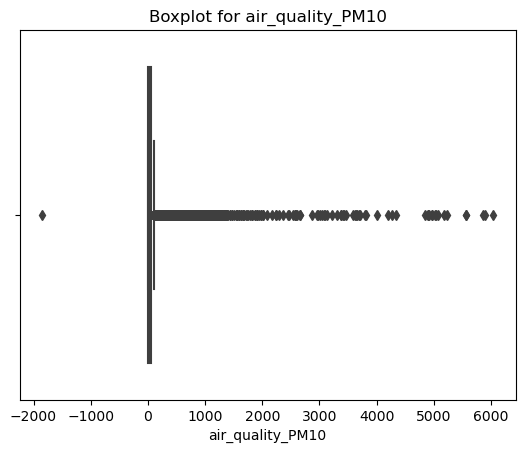

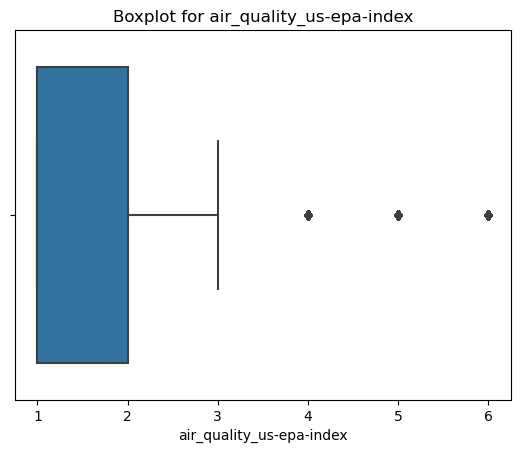

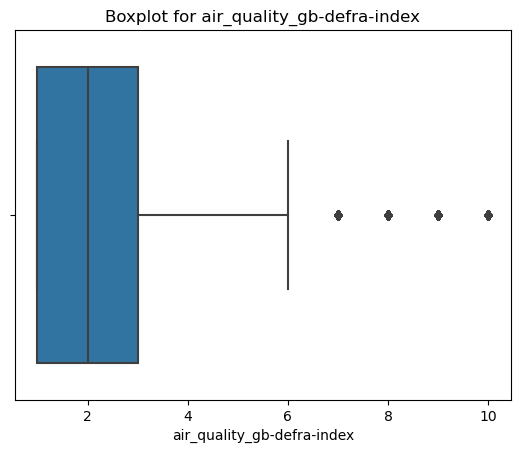

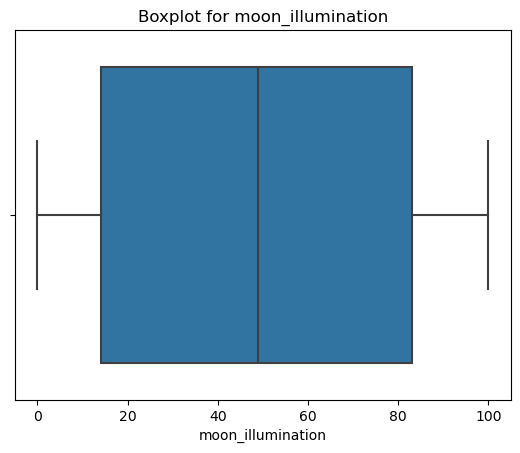

In [6]:
# Detect and Treat Outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [7]:
# Treat outliers using IQR
df = df.apply(pd.to_numeric, errors='coerce')

# Now compute Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [8]:
#Normalize/Scale the Data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("GlobalWeatherRepository.csv")

# Fill missing values for numerical columns with median (robust to outliers)
num_cols = [
    'temperature_celsius', 'wind_mph', 'humidity', 'pressure_mb', 
    'visibility_km', 'uv_index', 'gust_kph', 'precip_mm'
]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing values for categorical columns with mode (most frequent value)
cat_cols = ['wind_direction', 'condition_text']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Fill missing values in air quality columns with mean (ensures smooth trends)
air_quality_cols = [
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_PM2.5', 
    'air_quality_PM10', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide'
]
df[air_quality_cols] = df[air_quality_cols].fillna(df[air_quality_cols].mean())

# Drop non-essential columns (mostly text-based, not useful for forecasting)
df.drop(columns=[
    'country', 'location_name', 'timezone', 'last_updated', 
    'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase'
], inplace=True)

# Normalize numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['number'])), 
                         columns=df.select_dtypes(include=['number']).columns)

# Final check for any remaining missing values
print(df_scaled.isnull().sum())

# Save cleaned dataset
df_scaled.to_csv("cleaned_weather_data.csv", index=False)


latitude                        0
longitude                       0
last_updated_epoch              0
temperature_celsius             0
temperature_fahrenheit          0
wind_mph                        0
wind_kph                        0
wind_degree                     0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
moon_illuminat

In [9]:
# Basic Data Overview
print(df.describe())

           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  58075.000000  58075.000000        5.807500e+04         58075.000000   
mean      19.136135     22.185168        1.728791e+09            22.235211   
std       24.476993     65.811597        7.504821e+06             9.632555   
min      -41.300000   -175.200000        1.715849e+09           -24.900000   
25%        3.750000     -6.836100        1.722428e+09            17.000000   
50%       17.250000     23.320000        1.728812e+09            25.000000   
75%       40.400000     50.580000        1.735296e+09            28.500000   
max       64.150000    179.220000        1.741686e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            58075.000000  58075.000000  58075.000000  58075.000000   
mean                72.024985      8.280749     13.330509    169.332312   
std                 17.338400      9.331791     15.016366    103.659697 

**Exploratory Data Analysis (EDA)**

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


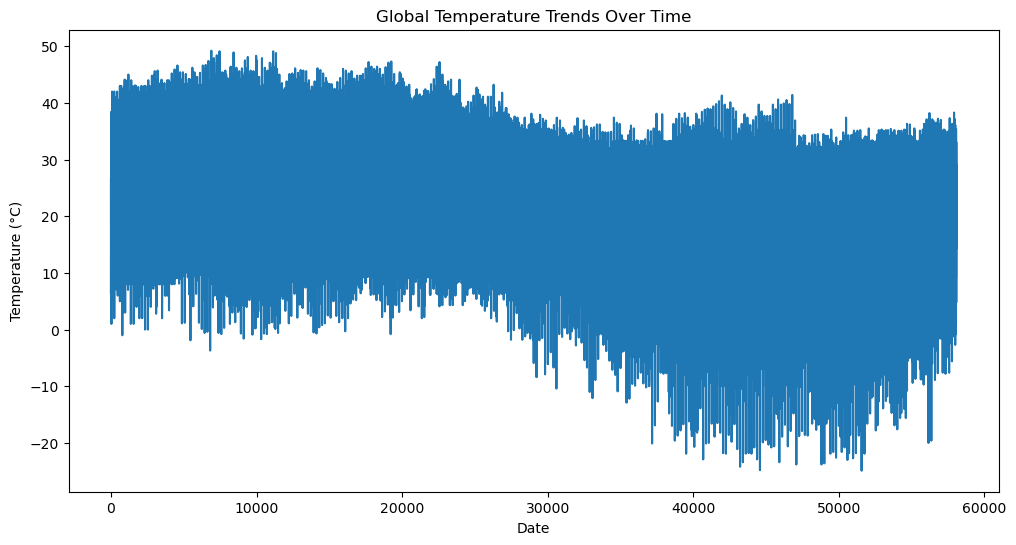

In [10]:
# Visualizing Temperature Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='temperature_celsius', data=df)
plt.title('Global Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


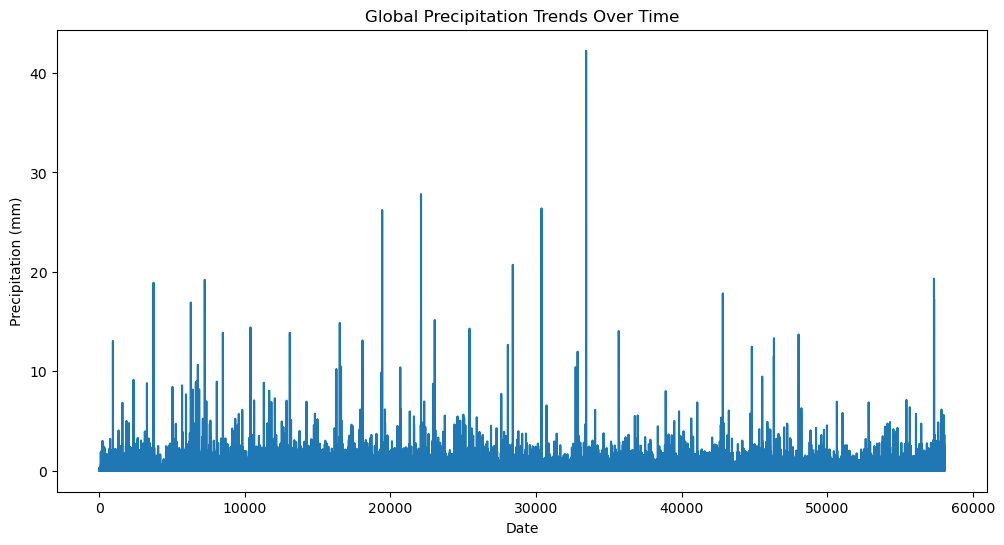

In [11]:
#  Visualizing Precipitation Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='precip_mm', data=df)
plt.title('Global Precipitation Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

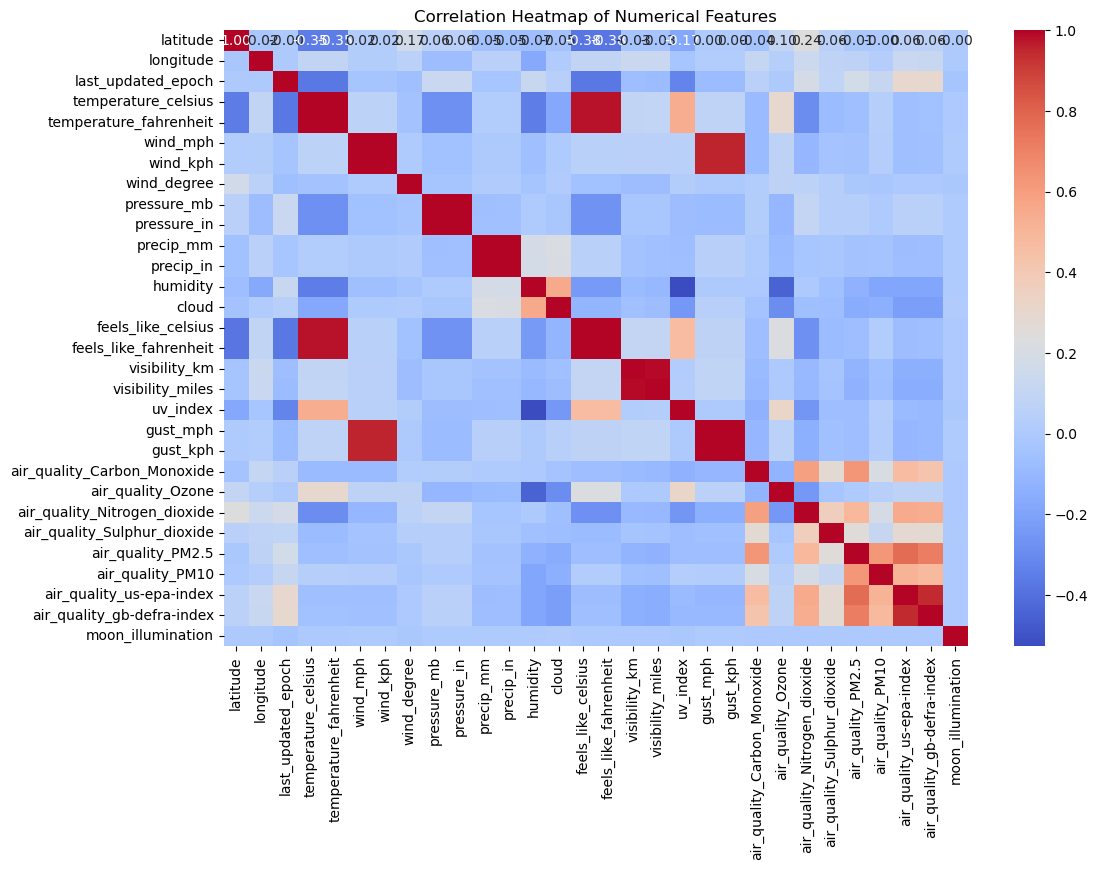

In [12]:
# Correlation Heatmap
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


C:\Users\patha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


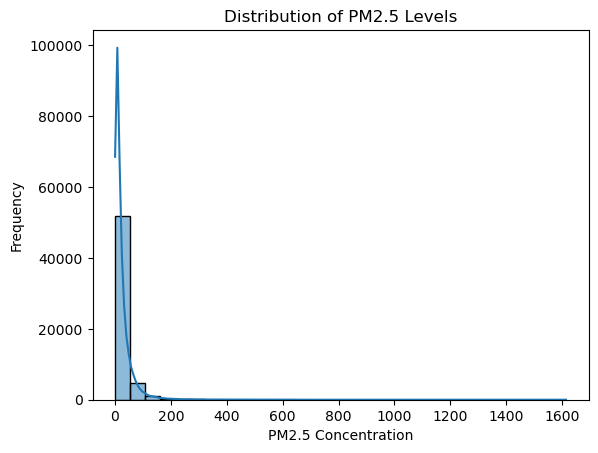

In [13]:
# Distribution of Air Quality Index (PM2.5)
sns.histplot(df['air_quality_PM2.5'], bins=30, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

**Model Building (Time Series Forecasting)**


Selected Features: ['temperature_fahrenheit', 'feels_like_fahrenheit', 'feels_like_celsius', 'latitude', 'longitude']
Training Set Size: (46460, 5)
Test Set Size: (11615, 5)


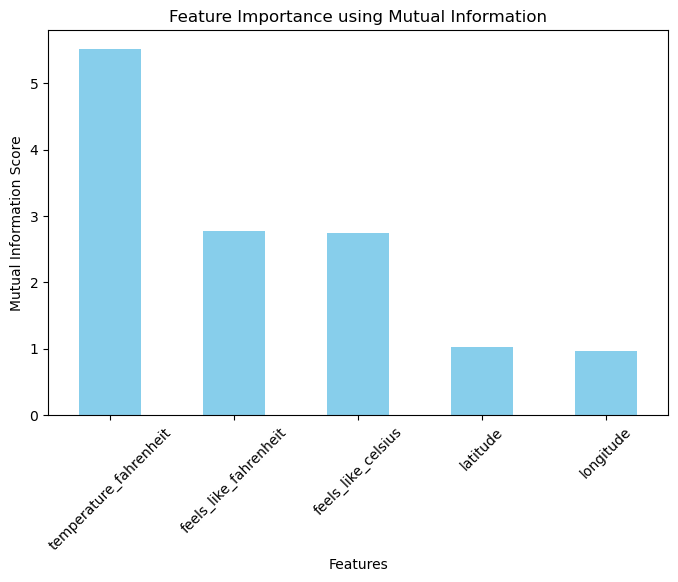

In [14]:
#FEATURE SELECTION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "Cleaned_Weather_Data.csv"
df = pd.read_csv(file_path)

# Convert to lower-memory dtypes
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')

# Define target variable
target = "temperature_celsius"

# Selecting numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if "last_updated_epoch" in numerical_features:
    numerical_features.remove("last_updated_epoch")  # Remove timestamp

# Compute Mutual Information for feature selection
X = df[numerical_features].drop(columns=[target])
y = df[target]

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

# Select only the **Top 5 Features**
selected_features = mi_scores.head(5).index.tolist()
print("Selected Features:", selected_features)

# Train-test split
X_selected = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

# Visualizing the selected features' importance
plt.figure(figsize=(8, 5))
mi_scores[selected_features].plot(kind="bar", color="skyblue")
plt.title("Feature Importance using Mutual Information")
plt.ylabel("Mutual Information Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()


**Applying Linear Regression, DecisionTree Regressor, RandomForest Regressor, GradientBoosting Regressor, XGBRegressor**

In [15]:
pip install xgboost

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import joblib
# Load cleaned dataset (update the file path if needed)
file_path = "Cleaned_Weather_Data.csv"
df = pd.read_csv(file_path)

# Selected features after feature selection
selected_features = ['feels_like_celsius', 'latitude', 'longitude']
target = "temperature_celsius"

# Splitting data into train and test sets
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    model_scores[name] = score
    print(f"{name} R² Score: {score:.4f}")

# Find the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]
best_model = models[best_model_name]  # Retrieve the actual model

print(f"\nBest Model: {best_model_name} with R² Score: {best_model_score:.4f}")
joblib.dump(best_model, "./best_weather_model.pkl")  # Save in the current directory



Linear Regression R² Score: 0.9636
Decision Tree R² Score: 0.9860
Random Forest R² Score: 0.9899
Gradient Boosting R² Score: 0.9856
XGBoost R² Score: 0.9912

Best Model: XGBoost with R² Score: 0.9912


['./best_weather_model.pkl']

In [17]:
#PREDICT
import pandas as pd
import joblib

# Load the saved best model
loaded_model = joblib.load("best_weather_model.pkl")

# Example new data (update values as needed)
new_data = pd.DataFrame({
    "feels_like_celsius": [26],
    "latitude": [40.7128],
    "longitude": [-74.0060]
})

# Predict temperature in Celsius
predicted_temp = loaded_model.predict(new_data)
print(f"Predicted Temperature (°C): {predicted_temp[0]:.2f}")


Predicted Temperature (°C): 1.11


**Advanced Forecasting (Multiple Models & Ensemble)**

In [18]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [20]:
# Load the data
df = pd.read_csv("GlobalWeatherRepository.csv", parse_dates=["last_updated"])

# Set 'last_updated' as index and sort it
df.set_index("last_updated", inplace=True)
df = df.sort_index()

# Resample data daily and take the mean temperature
df_daily = df["temperature_celsius"].resample("D").mean()
df_daily = df_daily.interpolate(method="time")  # Fill missing value based on time trend

# Check if data is now valid
print(df_daily.info())  # Ensure data isn't empty
print(df_daily.head())  # View first few rows


<class 'pandas.core.series.Series'>
DatetimeIndex: 300 entries, 2024-05-16 to 2025-03-11
Freq: D
Series name: temperature_celsius
Non-Null Count  Dtype  
--------------  -----  
300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB
None
last_updated
2024-05-16    23.767196
2024-05-17    24.451648
2024-05-18    25.355610
2024-05-19    25.270103
2024-05-20    25.430769
Freq: D, Name: temperature_celsius, dtype: float64


In [21]:
!pip install pmdarima


In [22]:
from pmdarima import auto_arima

# Fit the best SARIMA model automatically
sarima_model = auto_arima(df_daily, seasonal=True, m=7, stepwise=True)

# Show best model parameters
print(sarima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(1, 1, 3)   Log Likelihood                -229.020
Date:                Sat, 15 Mar 2025   AIC                            468.040
Time:                        05:06:16   BIC                            486.542
Sample:                    05-16-2024   HQIC                           475.445
                         - 03-11-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9849      0.033     29.447      0.000       0.919       1.050
ma.L1         -1.2006      0.037    -32.848      0.000      -1.272      -1.129
ma.L2         -0.1495      0.040     -3.715      0.0

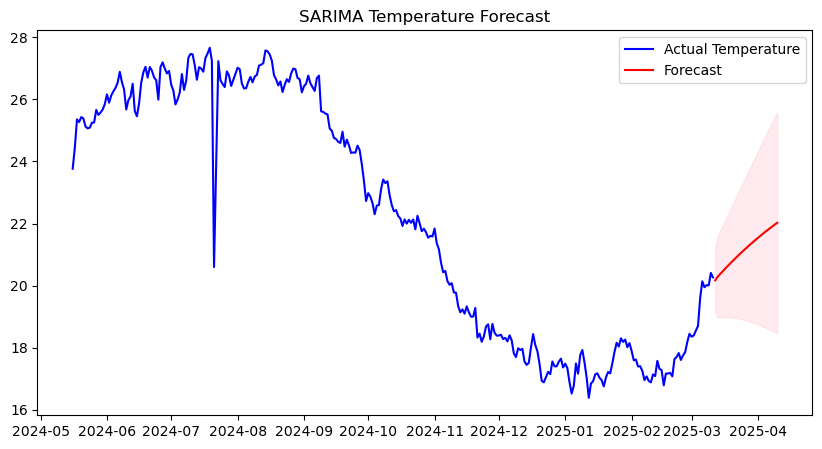

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Forecast next 30 days
n_forecast = 30
future_forecast, conf_int = sarima_model.predict(n_periods=n_forecast, return_conf_int=True)

# Convert conf_int to NumPy array if needed
conf_int = np.array(conf_int)

# Create future date range
last_date = df_daily.index[-1] if isinstance(df_daily.index[-1], pd.Timestamp) else pd.to_datetime(df_daily.index[-1])
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=n_forecast, freq="D")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df_daily, label="Actual Temperature", color="blue")
plt.plot(future_dates, future_forecast, label="Forecast", color="red")
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("SARIMA Temperature Forecast")
plt.show()


In [24]:
print("test Type:", type(y_test))
print("test Shape:", y_test.shape if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series) else "N/A")
print("test Length:", len(y_test))
print("test Sample:\n", y_test.head() if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame) else y_test)


test Type: <class 'pandas.core.series.Series'>
test Shape: (11615,)
test Length: 11615
test Sample:
 32035    1.179841
19724    0.837250
54330   -0.315102
47311   -1.675085
5517    -0.626549
Name: temperature_celsius, dtype: float64


In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure test set is not empty
if len(y_test) == 0:
    raise ValueError("Test set is empty. Check the splitting process.")

# Ensure y_test and future_forecast are NumPy arrays
y_test = np.array(y_test)
future_forecast = np.array(future_forecast)

# Ensure y_test length matches future_forecast
if len(future_forecast) != len(y_test):
    print(f"Warning: Adjusting test size from {len(y_test)} to {len(future_forecast)}")
    min_len = min(len(y_test), len(future_forecast))
    y_test = y_test[:min_len]
    future_forecast = future_forecast[:min_len]  # Trim forecast too

# Calculate error metrics
mae = mean_absolute_error(y_test, future_forecast)
mse = mean_squared_error(y_test, future_forecast)
rmse = np.sqrt(mse)

# Print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 21.2357
MSE: 452.2912
RMSE: 21.2671


In [26]:
pip install prophet

In [27]:
df_temp = df_daily.to_frame([['temperature_celsius']])  # Extract relevant data


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare Data for Prophet (requires specific format)
df_prophet = df_temp.reset_index()
df_prophet.columns = ['ds', 'y']

# Split Data
split_index = int(len(df_prophet) * 0.8)  # 80% train, 20% test
train_prophet = df_prophet.iloc[:split_index]
test_prophet = df_prophet.iloc[split_index:]


In [29]:
#Prophet model
model_prophet = Prophet()
model_prophet.fit(train_prophet)
future = model_prophet.make_future_dataframe(periods=len(y_test), freq='D')
forecast_prophet = model_prophet.predict(future)['yhat'].iloc[-len(y_test):].values

05:06:37 - cmdstanpy - INFO - Chain [1] start processing
05:06:38 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
def evaluate(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate(y_test, forecast_prophet, "Prophet")


Prophet - MAE: 16.17, RMSE: 16.22


**Unique & Advanced Analyses**

In [31]:
!pip install tensorflow


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the cleaned dataset
file_path = "Cleaned_Weather_Data.csv"  # Update with your actual path
df = pd.read_csv(file_path)

# Define target variable
target = "temperature_celsius"

# Selecting numerical features only
selected_features = ['temperature_fahrenheit', 'feels_like_fahrenheit', 'feels_like_celsius', 'latitude', 'longitude']

# Extract features and target
X = df[selected_features]
y = df[target].values.reshape(-1, 1)  # Ensure y is 2D for scaling

# Scale the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y)

# Save only the datasets
np.save("X_lstm.npy", X_scaled)
np.save("y_lstm.npy", y_scaled)

print("LSTM dataset saved separately!")


LSTM dataset saved separately!


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load the saved datasets
X = np.load("X_lstm.npy")
y = np.load("y_lstm.npy")

# Reshape X for LSTM (samples, timesteps, features)
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Adding time step dimension

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

print("LSTM Data Shape:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


LSTM Data Shape:
X_train: (46460, 1, 5) X_test: (11615, 1, 5)
y_train: (46460, 1) y_test: (11615, 1)


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 5)),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the trained LSTM model
model.save("lstm_weather_model.h5")

print("LSTM Model Trained and Saved Successfully!")


C:\Users\patha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.0429 - mae: 0.1009 - val_loss: 2.1070e-04 - val_mae: 0.0106
Epoch 2/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 1.1872e-04 - mae: 0.0077 - val_loss: 8.1554e-06 - val_mae: 0.0021
Epoch 3/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 7.2288e-06 - mae: 0.0020 - val_loss: 4.6600e-06 - val_mae: 0.0017
Epoch 4/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 3.7594e-06 - mae: 0.0015 - val_loss: 2.3100e-06 - val_mae: 0.0012
Epoch 5/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 2.9318e-06 - mae: 0.0013 - val_loss: 5.3132e-06 - val_mae: 0.0021
Epoch 6/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 3.3864e-06 - mae: 0.0014 - val_loss: 1.6499e-06 - val_mae: 0.0010
Epoch 7/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 2.6654e-06 - mae: 0.0013 - val_loss: 1.1737e-06 - val_mae: 8.2850e-04
Epoch 8/50
1452/1452 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 2.1943e-06 - mae: 0.0012 - val_los

LSTM Model Trained and Saved Successfully!


In [35]:
from sklearn.metrics import r2_score

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Reshape predictions and actual values
y_pred_train = y_pred_train.flatten()
y_pred_test = y_pred_test.flatten()
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Compute R² score
r2_train = r2_score(y_train_flat, y_pred_train)
r2_test = r2_score(y_test_flat, y_pred_test)

print(f"LSTM R² Score (Train): {r2_train:.4f}")
print(f"LSTM R² Score (Test): {r2_test:.4f}")


1452/1452 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
LSTM R² Score (Train): 0.9999
LSTM R² Score (Test): 0.9999


**Results & Visualization**


In [ ]:
pip install folium


In [69]:
import folium

# Create a Folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add temperature markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Lat: {row['latitude']}, Lon: {row['longitude']}: {row['temperature_celsius']}°C",
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Save and display map
m.save("temperature_map.html")
print("Temperature distribution map saved as 'temperature_map.html'.")

Temperature distribution map saved as 'temperature_map.html'.


In [70]:
import webbrowser
webbrowser.open("temperature_map.html")


True

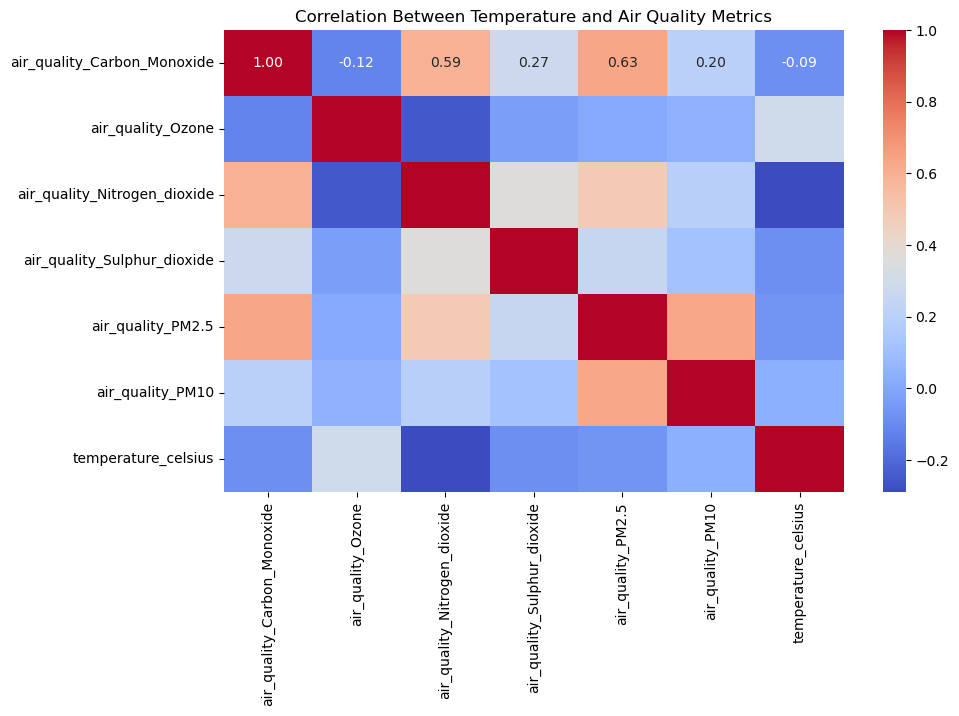

In [71]:
# Environmental Impact Analysis
# Correlation between temperature and air quality
air_quality_cols = [
    'air_quality_Carbon_Monoxide',
    'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5',
    'air_quality_PM10'
]

corr_env = df[air_quality_cols + ['temperature_celsius']].corr()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_env, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Temperature and Air Quality Metrics')
plt.show()